# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Exploaring the Data](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
- [4. Data Preparation and Analysis](#4)
    - [4.1 Drop Unwanted rows and columns](#4.1)
- [5. Feature Engineering](#5)
- [6. Assign Feature and target variables](#6)
- [7. SVM model](#7)
    - [7.1 Accuarcy of the model](#7.1)
    - [7.2 Confusion Matrix](#7.2)
    - [7.3 ROC Curve](#7.3)
- [8. ANN](#8)
    - [8.1 Build and Train the NN](#8.1)
    - [8.2 Accuarcy of NN](#8.2)
    - [8.3 Loss Curve](#8.3)
    - [8.4 Confusion Matrix](#8.4)

<a id="1"></a>
<h1>Data Description</h1><br><br>

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The two types are:<br>

1 - Spruce/Fir<br>
2 - Lodgepole Pine<br>


The training set contains both features and the Cover_Type. The test set contains only the features.<br>

**Data Fields**:<br>
Elevation - Elevation in meters<br>
Aspect - Aspect in degrees azimuth<br>
Slope - Slope in degrees<br>
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features<br>
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features<br>
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway<br>
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice<br>
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice<br>
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice<br>
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points<br>
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation<br>
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation<br>
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation<br>

**The wilderness areas are:**<br>

1 - Rawah Wilderness Area<br>
2 - Neota Wilderness Area<br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

**The soil types are:**<br>

1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
9 Troutville family, very stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
18 Rogert family, very stony.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

<a id="2"></a>
# Import Necessaries Libaries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential

<a id="3"></a>
# Exploaring the data

<a id="3.1"></a>
**Explore Training data**

In [2]:
df = pd.read_csv('TPS.zip') # read training data

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3305,263,5,341,264,1520,197,229,161,1070,...,0,0,0,0,0,0,0,1,0,1
1,2877,68,17,252,249,1435,197,208,90,759,...,0,0,0,0,0,0,0,0,0,2
2,3215,362,8,373,35,807,252,226,183,915,...,0,0,0,0,0,0,0,0,0,1
3,3379,101,35,721,21,1515,244,207,48,2732,...,0,0,1,0,0,0,0,0,0,1
4,2628,132,15,174,-9,561,150,209,2,566,...,0,0,0,0,0,0,0,0,0,2


In [4]:
df.shape # 500k rows and 55 Features in the training data

(500000, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           500000 non-null  int64
 1   Aspect                              500000 non-null  int64
 2   Slope                               500000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    500000 non-null  int64
 4   Vertical_Distance_To_Hydrology      500000 non-null  int64
 5   Horizontal_Distance_To_Roadways     500000 non-null  int64
 6   Hillshade_9am                       500000 non-null  int64
 7   Hillshade_Noon                      500000 non-null  int64
 8   Hillshade_3pm                       500000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  500000 non-null  int64
 10  Wilderness_Area1                    500000 non-null  int64
 11  Wilderness_Area2                    500000 non-null 

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2998.670064,151.514102,15.020952,273.284724,51.366596,1808.319074,211.806542,221.157852,141.701978,1593.188710,...,0.036588,0.039138,0.012154,0.015846,0.010904,0.012298,0.038248,0.036396,0.029328,1.617268
std,251.286263,109.404390,8.489674,226.664690,67.986341,1315.169159,30.551112,22.043741,42.628432,1098.247417,...,0.187748,0.193923,0.109573,0.124880,0.103851,0.110212,0.191795,0.187274,0.168724,0.486054
min,2360.000000,-33.000000,-3.000000,-50.000000,-299.000000,-257.000000,0.000000,49.000000,-52.000000,-257.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2792.000000,61.000000,9.000000,113.000000,4.000000,865.000000,198.000000,210.000000,116.000000,811.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2978.000000,122.000000,14.000000,214.000000,31.000000,1480.000000,218.000000,224.000000,142.000000,1397.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3207.000000,246.000000,20.000000,363.000000,78.000000,2423.000000,233.000000,237.000000,169.000000,2104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4296.000000,404.000000,62.000000,1592.000000,614.000000,7664.000000,289.000000,269.000000,272.000000,8004.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
df.Wilderness_Area1.unique()

array([0, 1], dtype=int64)

In [8]:
df.nunique()

Elevation                             1766
Aspect                                 433
Slope                                   66
Horizontal_Distance_To_Hydrology      1570
Vertical_Distance_To_Hydrology         812
Horizontal_Distance_To_Roadways       7392
Hillshade_9am                          268
Hillshade_Noon                         207
Hillshade_3pm                          319
Horizontal_Distance_To_Fire_Points    7559
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

**Soil_Type7 and Soil_Type15 has only 1 value so, we will drop them**

In [9]:
df.Soil_Type7.value_counts()

0    500000
Name: Soil_Type7, dtype: int64

In [10]:
df.Soil_Type15.value_counts()

0    500000
Name: Soil_Type15, dtype: int64

In [11]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [12]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

<a id = '4'></a>
# Data Preparation and Analysis

In [13]:
FEATURES = [col for col in df.columns if col not in ['Cover_Type']]

In [14]:
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [15]:
df.Cover_Type.value_counts()

2    308634
1    191366
Name: Cover_Type, dtype: int64

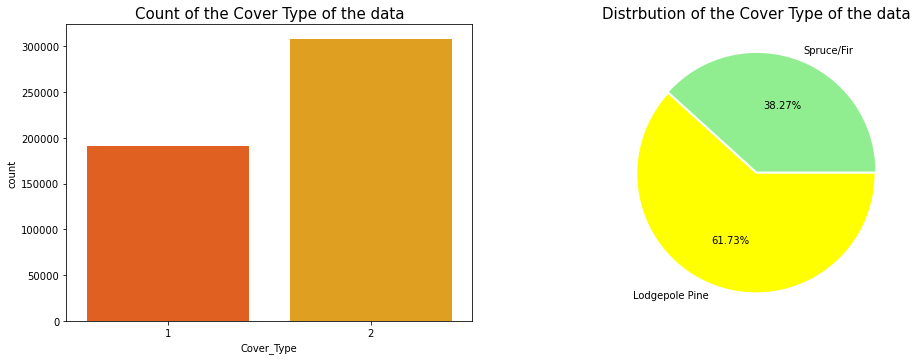

In [16]:
# count plot for the target variable
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.title("Count of the Cover Type of the data", {'fontsize' : '15'})
sns.countplot(x='Cover_Type', data=df, palette='autumn');

plt.subplot(2,2,2)
class_1 = df.Cover_Type[df.Cover_Type == 1].count()
class_2 = df.Cover_Type[df.Cover_Type == 2].count()
plt.title("Distrbution of the Cover Type of the data", {'fontsize' : '15'})
plt.pie([class_1, class_2], labels=['Spruce/Fir','Lodgepole Pine'], autopct="%.2f%%", explode=[0.01,0.01], colors=['lightgreen', 'yellow'])
plt.show()

**We have about 300k values for Class 2 and about 200k value for Class 1**

**Soil_type7 and Soil_Type15 are all zero values**

<a id = '4.1'></a>
### Drop Unwanted columns

In [17]:
df.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

In [18]:
FEATURES.remove('Soil_Type7')
FEATURES.remove('Soil_Type15')

In [19]:
df.shape

(500000, 53)

In [20]:
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

<a id = '5'></a>
# Features Engineering

In [21]:
df[FEATURES].mean()

Elevation                             2998.670064
Aspect                                 151.514102
Slope                                   15.020952
Horizontal_Distance_To_Hydrology       273.284724
Vertical_Distance_To_Hydrology          51.366596
Horizontal_Distance_To_Roadways       1808.319074
Hillshade_9am                          211.806542
Hillshade_Noon                         221.157852
Hillshade_3pm                          141.701978
Horizontal_Distance_To_Fire_Points    1593.188710
Wilderness_Area1                         0.286090
Wilderness_Area2                         0.037502
Wilderness_Area3                         0.682494
Wilderness_Area4                         0.000528
Soil_Type1                               0.012864
Soil_Type2                               0.024798
Soil_Type3                               0.000634
Soil_Type4                               0.034308
Soil_Type5                               0.014976
Soil_Type6                               0.001984


In [22]:
df["mean"] = df[FEATURES].mean(axis=1)
df["std"] = df[FEATURES].std(axis=1)
df["min"] = df[FEATURES].min(axis=1)
df["max"] = df[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

In [23]:
df.shape

(500000, 57)

In [24]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mean,std,min,max
0,3305,263,5,341,264,1520,197,229,161,1070,...,0,0,0,1,0,1,141.480769,518.478070,0,3305
1,2877,68,17,252,249,1435,197,208,90,759,...,0,0,0,0,0,2,118.346154,451.679345,0,2877
2,3215,362,8,373,35,807,252,226,183,915,...,0,0,0,0,0,1,122.634615,474.076813,0,3215
3,3379,101,35,721,21,1515,244,207,48,2732,...,0,0,0,0,0,1,173.211538,630.172318,0,3379
4,2628,132,15,174,-9,561,150,209,2,566,...,0,0,0,0,0,2,85.192308,377.770863,-9,2628


<a id='6'></a>
# Assign Feature and Target variables

In [25]:
# Scalling the features
scaler = StandardScaler()
for col in FEATURES:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))

In [26]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mean,std,min,max
0,1.219049,1.019027,-1.180371,0.298747,3.127593,-0.219226,-0.484649,0.355754,0.452704,-0.476386,...,-0.104996,-0.111585,-0.199422,5.145439,-0.173822,1,-0.061334,-0.315841,0.213587,0.032529
1,-0.484190,-0.763353,0.233113,-0.093904,2.906960,-0.283857,-0.484649,-0.596898,-1.212853,-0.759564,...,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,2,-0.727112,-0.814984,0.213587,-0.549995
2,0.860891,1.923927,-0.827000,0.439925,-0.240734,-0.761362,1.315615,0.219661,0.968792,-0.617520,...,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,1,-0.603696,-0.647623,0.213587,-0.089965
3,1.513534,-0.461720,2.353338,1.975234,-0.446658,-0.223028,1.053758,-0.642262,-2.198112,1.036936,...,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,1,0.851827,0.518778,0.213587,0.133245
4,-1.475092,-0.178367,-0.002468,-0.438025,-0.887923,-0.948411,-2.023056,-0.551534,-3.277205,-0.935299,...,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,2,-1.681226,-1.367255,-0.450339,-0.888893


In [27]:
X = df[FEATURES]
y = df.Cover_Type

In [28]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,mean,std,min,max
0,1.219049,1.019027,-1.180371,0.298747,3.127593,-0.219226,-0.484649,0.355754,0.452704,-0.476386,...,-0.12689,-0.104996,-0.111585,-0.199422,5.145439,-0.173822,-0.061334,-0.315841,0.213587,0.032529
1,-0.484190,-0.763353,0.233113,-0.093904,2.906960,-0.283857,-0.484649,-0.596898,-1.212853,-0.759564,...,-0.12689,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,-0.727112,-0.814984,0.213587,-0.549995
2,0.860891,1.923927,-0.827000,0.439925,-0.240734,-0.761362,1.315615,0.219661,0.968792,-0.617520,...,-0.12689,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,-0.603696,-0.647623,0.213587,-0.089965
3,1.513534,-0.461720,2.353338,1.975234,-0.446658,-0.223028,1.053758,-0.642262,-2.198112,1.036936,...,-0.12689,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,0.851827,0.518778,0.213587,0.133245
4,-1.475092,-0.178367,-0.002468,-0.438025,-0.887923,-0.948411,-2.023056,-0.551534,-3.277205,-0.935299,...,-0.12689,-0.104996,-0.111585,-0.199422,-0.194347,-0.173822,-1.681226,-1.367255,-0.450339,-0.888893


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

<a id='7'></a>
# SVM model

In [86]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

<a id = '7.1'></a>
***Accuarcy of the model***

In [31]:
svm_model = SVC()
train(svm_model, "SVM")

SVM model score on Training data: 96.91733333333333%
SVM model score on Testing data: 96.188%


In [33]:
y_pred = svm_model.predict(X_test)

<a id='7.2'></a>
***Confusion Matrix***

In [133]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45506,  2375],
       [ 2390, 74729]], dtype=int64)

<AxesSubplot:>

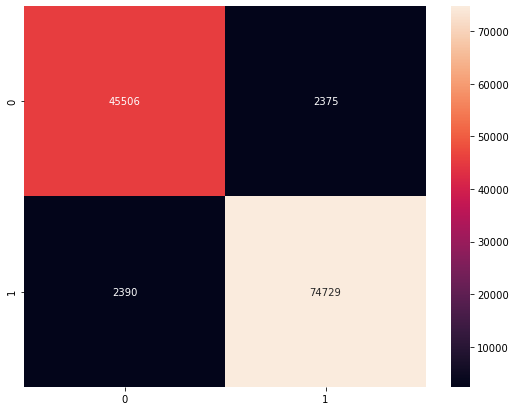

In [134]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d')

<a id='7.3'></a>
***ROC Curve***

In [42]:
y_pred_svm = svm_model.decision_function(X_test)

In [47]:
y_test_repl = y_test.replace(to_replace=[1,2], value=[0,1])

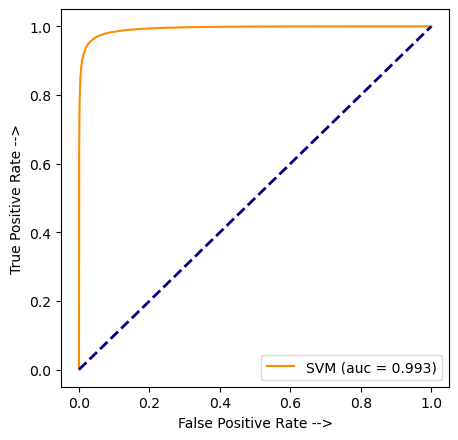

In [138]:
svm_fpr, svm_tpr, _ = roc_curve(y_test_repl, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, color="darkorange", label='SVM (auc = %0.3f)' % auc_svm)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [30]:
X_nn = df[FEATURES].to_numpy().astype(np.float32)
y_nn = df['Cover_Type'].to_numpy().astype(np.float32)

In [31]:
X_nn

array([[ 1.2190489 ,  1.0190269 , -1.1803707 , ..., -0.31584066,
         0.21358654,  0.03252852],
       [-0.48418957, -0.76335317,  0.2331126 , ..., -0.8149843 ,
         0.21358654, -0.54999524],
       [ 0.8608913 ,  1.9239274 , -0.82699984, ..., -0.6476225 ,
         0.21358654, -0.08996479],
       ...,
       [ 3.4117694 , -0.95530176, -0.35583878, ...,  0.43904173,
         0.21358654,  0.7824598 ],
       [ 0.00529252, -0.13266484, -1.5337415 , ..., -0.8398522 ,
         0.21358654, -0.3825877 ],
       [-0.7269408 , -1.0649867 ,  0.11532233, ..., -1.1538353 ,
         0.21358654, -0.63301843]], dtype=float32)

In [32]:
X_nn.shape

(500000, 56)

In [33]:
y_nn.shape

(500000,)

<a id='8'></a>
# ANN

In [34]:
LE = LabelEncoder()
y_nn_transform = to_categorical(LE.fit_transform(y_nn))

In [35]:
y_nn_transform

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [36]:
y_nn_transform.shape

(500000, 2)

In [37]:
trans_df = pd.DataFrame(y_nn_transform)
trans_df.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [38]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn_transform, test_size=0.25, random_state=0)

<a id='8.1'></a>
**Build and train Neural Network**

In [39]:
def load_model(): 
    model = Sequential([
        Dense(2048, activation = 'swish', input_shape = [X.shape[1]]),
        Dense(1024, activation ='swish'),
        Dense(512, activation ='swish'),
        Dense(2, activation='softmax'),
    ])
    model.compile(
        optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    

nn_model = load_model()
history = nn_model.fit(  X_train_nn , y_train_nn,
                validation_data = (X_test_nn , y_test_nn),
                epochs = 5
              )

Epoch 1/5
11719/11719 [==============================] - 446s 38ms/step - loss: 0.1017 - acc: 0.9592 - val_loss: 0.0790 - val_acc: 0.9673
Epoch 2/5
11719/11719 [==============================] - 447s 38ms/step - loss: 0.0868 - acc: 0.9676 - val_loss: 0.0708 - val_acc: 0.9691
Epoch 3/5
11719/11719 [==============================] - 445s 38ms/step - loss: 0.0708 - acc: 0.9698 - val_loss: 0.0714 - val_acc: 0.9708
Epoch 4/5
11719/11719 [==============================] - 462s 39ms/step - loss: 0.0677 - acc: 0.9712 - val_loss: 0.0676 - val_acc: 0.9711
Epoch 5/5
11719/11719 [==============================] - 506s 43ms/step - loss: 0.0638 - acc: 0.9724 - val_loss: 0.0644 - val_acc: 0.9724


<a id='8.2'></a>
**Accuarcy of the NN**

In [40]:
nn_model.evaluate(X_test_nn, y_test_nn)

3907/3907 [==============================] - 45s 12ms/step - loss: 0.0644 - acc: 0.9724


[0.06441473215818405, 0.9724400043487549]

<a id='8.3'></a>
**Loss Curve**

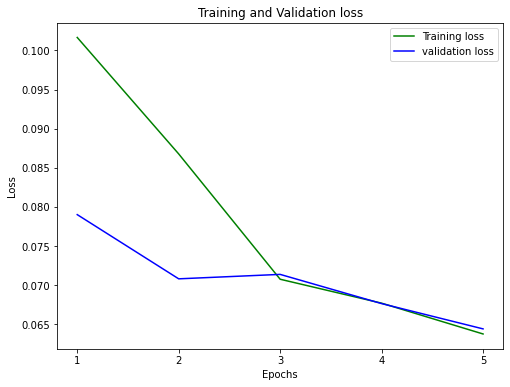

In [41]:
plt.figure(figsize=(8,6))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,6))
plt.legend()
plt.show()

In [42]:
y_predicted = nn_model.predict(X_test_nn)

In [43]:
y_predicted

array([[9.9860734e-01, 1.3926453e-03],
       [9.9962831e-01, 3.7170653e-04],
       [9.9999499e-01, 4.9707014e-06],
       ...,
       [7.6174758e-02, 9.2382520e-01],
       [3.8169391e-19, 1.0000000e+00],
       [9.7297013e-01, 2.7029809e-02]], dtype=float32)

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [45]:
y_predicted_labels

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [46]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(125000,)

In [52]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn, test_size=0.25, random_state=0)

In [53]:
y_test_nn.shape

(125000,)

In [56]:
y_test_nn

array([1., 1., 1., ..., 2., 2., 1.], dtype=float32)

In [65]:
y_test_nn_replace = np.where(y_test_nn==1, 0, y_test_nn) 
y_test_nn_replace = np.where(y_test_nn_replace==2, 1, y_test_nn_replace) 

In [66]:
y_test_nn_replace

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [67]:
cm = tf.math.confusion_matrix(labels=y_test_nn_replace, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[45614,  2267],
       [ 1178, 75941]])>

<a id='8.4'></a>
**Confusion Matrix**

<AxesSubplot:>

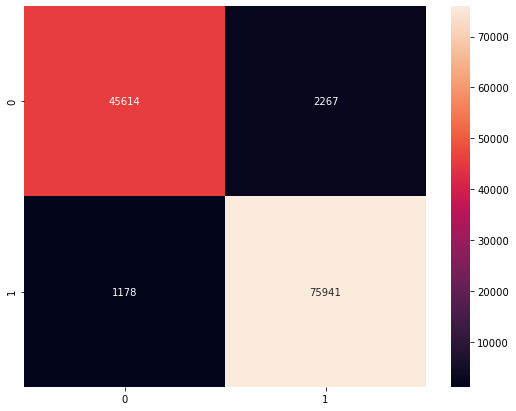

In [68]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d')